In [34]:
import architecture
import data_setup
import engine
import os 
import torch

/Users/lam.nguyen/Desktop/GithubClone/TI_Final/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#  Set up data and folder zone

In [2]:
# # Set up folder and extract files in zip
# data_setup.extractzip()

In [3]:
# data_setup.concat_files("train")

In [4]:
# data_setup.concat_files("validation")

In [5]:
# data_setup.concat_files("test")

In [6]:
# # Read and change data into DataLoader
# train_dataloader = data_setup.create_dataloaders(os.path.join("..", "Data", "train", "StockData_train.csv"), 
#                                                  target_col='close', 
#                                                  batch_size=64)


In [7]:
# import pandas as pd
# import os
# tosave = pd.read_csv(os.path.join("..", "Data", "train", "StockData.csv"), index_col=0)
# train = tosave.sample(int(0.8*len(tosave))).reset_index().drop('index', axis=1)
# test = tosave.sample(len(tosave) - int(0.8*len(tosave))).reset_index().drop('index',axis=1)
# # tosave.to_csv(os.path.join("..", "Data", "train", "StockData32_train.csv"))

In [8]:
# # tosave = tosave.fillna(0.0)
# train.to_csv(os.path.join("..", "Data", "train", "StockData_train.csv"))

In [9]:
# test.to_csv(os.path.join("..", "Data", "test", "StockData_test.csv"))

In [10]:
# # Initialise model
# model = architecture.SPP(input_size=12,
#                          hidden_size=64,
#                          output_shape=1)

In [11]:
# # Loss function and optimizer
# loss_func = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(params=model.parameters(),
#                              lr=0.01)

In [12]:
# from torchinfo import summary

# summary(model,
#         input_size=(64, 12),
#         col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
#         row_settings = ["var_names"])

In [13]:
# writer = engine.create_writer(experiment_name="SPP",
#                               model_name="base")

In [14]:
# # Training
# results = engine.train(model=model,
#                        train_dataloader=train_dataloader,
#                        loss_func=loss_func,
#                        epochs = 5,
#                        optimizer=optimizer)
#                     #    writer=writer)

# Training

In [15]:
files_train = []
files_test = []
ind = 0
for f in os.listdir(os.path.join("..", "Data", "train")):
    files_train.append(f)

for f in os.listdir(os.path.join("..", "Data", "test")):
    files_test.append(f)
files_train.sort()
files_test.sort()
file2train = files_train[ind]
file2test = files_test[ind]

In [16]:
if file2train[:8] == file2test[:8]:
  print("Yes")
  print("file2train:", file2train)
  print("file2test:", file2test)

Yes
file2train: CTG_data2_train.csv
file2test: CTG_data2_test.csv


In [17]:
lr = 0.001
hidden_size = 256
batch_size = 16
architect = "TransformerGRU"
model_name = architect + "_" + str(hidden_size) + "_" + str(batch_size) + "_" + str(lr)[0] + str(lr)[2:]

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [19]:
# Read and change data into DataLoader
train_dataloader, test_dataloader = data_setup.create_dataloaders(train_path=os.path.join("..", "Data", "train", file2train),
                                                                 test_path=os.path.join("..", "Data", "test", file2test),
                                                                 target_col='close', 
                                                                 batch_size=batch_size)


In [20]:
# # Initialise model
# model = architecture.TransformerGRU_model(input_size=6,
#                          hidden_size=hidden_size,
#                          output_shape=1).to(device)
# # Initialise model
model = architecture.TransformerLSTM_model(input_size=6,
                         hidden_size=hidden_size,
                         output_shape=1).to(device)

# # Initialise model
# model = architecture.LSTM_model(input_size=6,
#                          hidden_size=hidden_size,
#                          output_shape=1).to(device)

In [21]:
# Loss function and optimizer
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                              lr=lr)

In [22]:
from torchinfo import summary

summary(model, 
        input_size=(batch_size, 7, 6),
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        row_settings = ["var_names"])

Layer (type (var_name))                            Input Shape               Output Shape              Param #                   Trainable
TransformerLSTM_model (TransformerLSTM_model)      [16, 7, 6]                [16, 1]                   1,315,072                 True
├─ReLU (relu1)                                     [16, 7, 6]                [16, 7, 6]                --                        --
├─LSTM (lstm1)                                     [16, 7, 6]                [16, 7, 256]              796,672                   True
├─Dropout (dropout1)                               [16, 7, 256]              [16, 7, 256]              --                        --
├─TransformerEncoder (transformer_encoder)         [16, 7, 256]              [16, 7, 256]              --                        True
│    └─ModuleList (layers)                         --                        --                        --                        True
│    │    └─TransformerEncoderLayer (0)            [16, 7, 25

In [23]:
# writer = engine.create_writer(experiment_name="development",
#                               model_name=model_name)

In [24]:
# Training
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       loss_func=loss_func,
                       epochs = 100,
                       optimizer=optimizer,
                       writer=None,
                       device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:04<07:11,  4.36s/it]

Epoch: 1 | Train RMSE: 4.1988 |  Test RMSE: 2.5924


  2%|▏         | 2/100 [00:08<06:45,  4.13s/it]

Epoch: 2 | Train RMSE: 1.9111 |  Test RMSE: 1.3298


  3%|▎         | 3/100 [00:12<06:33,  4.06s/it]

Epoch: 3 | Train RMSE: 1.8914 |  Test RMSE: 1.1499


  4%|▍         | 4/100 [00:17<06:56,  4.34s/it]

Epoch: 4 | Train RMSE: 1.8486 |  Test RMSE: 1.0323


  5%|▌         | 5/100 [00:21<06:50,  4.32s/it]

Epoch: 5 | Train RMSE: 1.6328 |  Test RMSE: 0.9048


  6%|▌         | 6/100 [00:25<06:54,  4.41s/it]

Epoch: 6 | Train RMSE: 1.6307 |  Test RMSE: 0.8566


  7%|▋         | 7/100 [00:30<06:44,  4.34s/it]

Epoch: 7 | Train RMSE: 1.4506 |  Test RMSE: 0.7548


  8%|▊         | 8/100 [00:35<07:08,  4.66s/it]

Epoch: 8 | Train RMSE: 1.2329 |  Test RMSE: 0.6362


  9%|▉         | 9/100 [00:39<06:48,  4.49s/it]

Epoch: 9 | Train RMSE: 1.0850 |  Test RMSE: 0.3683


 10%|█         | 10/100 [00:44<06:51,  4.57s/it]

Epoch: 10 | Train RMSE: 0.9926 |  Test RMSE: 0.3185


 11%|█         | 11/100 [00:48<06:46,  4.57s/it]

Epoch: 11 | Train RMSE: 0.9809 |  Test RMSE: 0.3320


 12%|█▏        | 12/100 [00:53<06:37,  4.51s/it]

Epoch: 12 | Train RMSE: 0.9190 |  Test RMSE: 0.2466


 13%|█▎        | 13/100 [00:57<06:34,  4.54s/it]

Epoch: 13 | Train RMSE: 0.8500 |  Test RMSE: 0.3062


 14%|█▍        | 14/100 [01:03<06:56,  4.84s/it]

Epoch: 14 | Train RMSE: 0.8724 |  Test RMSE: 0.3123


 15%|█▌        | 15/100 [01:08<06:59,  4.93s/it]

Epoch: 15 | Train RMSE: 0.8717 |  Test RMSE: 0.2975


 16%|█▌        | 16/100 [01:13<06:59,  5.00s/it]

Epoch: 16 | Train RMSE: 0.8434 |  Test RMSE: 0.3234


 17%|█▋        | 17/100 [01:19<07:11,  5.20s/it]

Epoch: 17 | Train RMSE: 0.8388 |  Test RMSE: 0.3102


 18%|█▊        | 18/100 [01:24<06:59,  5.11s/it]

Epoch: 18 | Train RMSE: 0.8082 |  Test RMSE: 0.3689


 19%|█▉        | 19/100 [01:29<06:44,  4.99s/it]

Epoch: 19 | Train RMSE: 0.8145 |  Test RMSE: 0.5033


 20%|██        | 20/100 [01:35<07:03,  5.29s/it]

Epoch: 20 | Train RMSE: 0.8559 |  Test RMSE: 0.5065


 21%|██        | 21/100 [01:40<07:12,  5.47s/it]

Epoch: 21 | Train RMSE: 0.8292 |  Test RMSE: 0.5526


 22%|██▏       | 22/100 [01:45<06:49,  5.25s/it]

Epoch: 22 | Train RMSE: 0.7507 |  Test RMSE: 0.4684


 23%|██▎       | 23/100 [01:51<07:07,  5.56s/it]

Epoch: 23 | Train RMSE: 0.6650 |  Test RMSE: 0.5436


 23%|██▎       | 23/100 [01:56<06:29,  5.06s/it]


KeyboardInterrupt: 

In [26]:
engine.save_model(model=model,
                  model_name=model_name,
                  save_folder=os.path.join("..", "model", architect))

[INFO] Model is saved successfully to ../model/lstm_64_32_0001


'../model/lstm_64_32_0001'

In [29]:
import pandas as pd
tosave = pd.DataFrame(results).
tosave.to_csv(os.path.join("..", "log_df", architect, model_name + ".csv"))

# Visualisation

In [86]:
loss_func_test = torch.nn.MSELoss()
hidden_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [87]:
lstm = architecture.LSTM_model(input_size=6,
                               hidden_size=hidden_size,
                               output_shape=1).to(device)

transformerlstm = architecture.TransformerLSTM_model(input_size=6,
                                                     hidden_size=hidden_size,
                                                     output_shape=1).to(device)


transformergru = architecture.TransformerGRU_model(input_size=6,
                                                         hidden_size=hidden_size,
                                                         output_shape=1).to(device)


In [88]:
files_train = []
files_test = []
ind = 0
for f in os.listdir(os.path.join("..", "Data", "train")):
    files_train.append(f)

for f in os.listdir(os.path.join("..", "Data", "test")):
    files_test.append(f)
files_train.sort()
files_test.sort()
file2train = files_train[ind]
file2test = files_test[ind]

In [89]:
file2test

'CTG_data2_test.csv'

In [90]:
train_dataloader, test_dataloader = data_setup.create_dataloaders(train_path=os.path.join("..", "Data", "train", file2train),
                                                                  test_path=os.path.join("..", "Data", "test", file2test),
                                                                  target_col='close',
                                                                  batch_size=16)

In [91]:
lstm.load_state_dict(torch.load(os.path.join("..", "model", "LSTM", "LSTM_CTG128_16_0001"), 
                                map_location=torch.device('cpu')))

transformerlstm.load_state_dict(torch.load(os.path.join("..", "model", "TransformerLSTM", "TransformerLSTM_CTG128_16_0001"),
                                           map_location=torch.device('cpu')))

transformergru.load_state_dict(torch.load(os.path.join("..", "model", "TransformerGRU", "Transformer-GRU_CTG128_16_0001"),
map_location=torch.device('cpu')))

<All keys matched successfully>

In [92]:
lstm_results = engine.test_step(model=lstm,
                                dataloader=test_dataloader,
                                loss_func=loss_func_test,
                                device=device)

In [93]:
transformerlstm_results = engine.test_step(model=transformerlstm, 
                                           dataloader=test_dataloader, 
                                           loss_func=loss_func_test, 
                                           device=device)

In [94]:
transformergru_results = engine.test_step(model=transformergru,
                                          dataloader=test_dataloader,
                                          loss_func=loss_func_test,
                                          device=device)

In [95]:
import pandas as pd
import os
lstm_traindata = pd.read_csv(os.path.join("..", "log_df", "LSTM", "LSTM_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"}, axis=1)
transformerlstm_traindata = pd.read_csv(os.path.join("..", "log_df", "TransformerLSTM", "TransformerLSTM_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"}, axis=1)
transformergru_traindata = pd.read_csv(os.path.join("..", "log_df", "TransformerGRU", "Transformer-GRU_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"},axis=1)

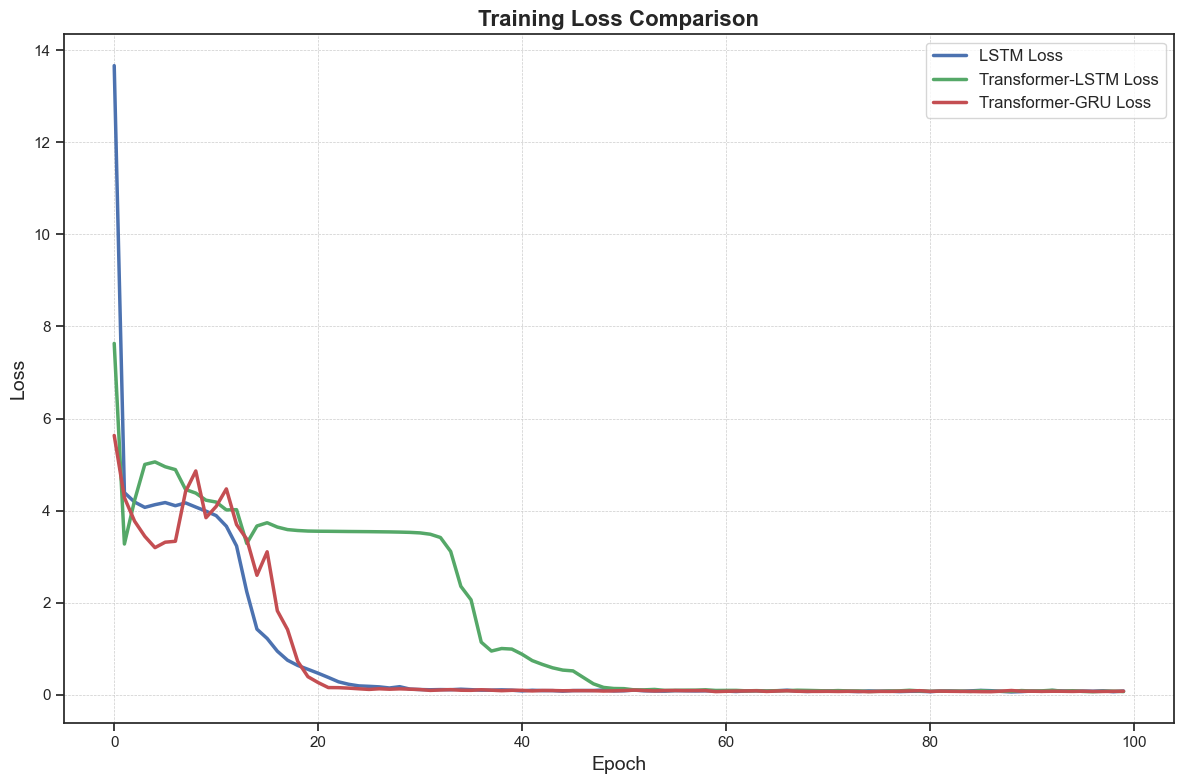

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set(style="ticks")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting the loss for each model with different styles and increased line width
plt.plot(lstm_traindata['Epoch'], lstm_traindata['train_loss'], label='LSTM Loss', color='b', linewidth=2.5)
plt.plot(transformerlstm_traindata['Epoch'], transformerlstm_traindata['train_loss'], label='Transformer-LSTM Loss', color='g', linewidth=2.5)
plt.plot(transformergru_traindata['Epoch'], transformergru_traindata['train_loss'], label='Transformer-GRU Loss', color='r', linewidth=2.5)

# Adding labels and title with enhanced font sizes
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss Comparison', fontsize=16, fontweight='bold')

# Adding a legend with a shadow effect
plt.legend(loc='upper right', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a tight layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

In [97]:
import numpy as np
import pandas as pd
import os

lstm_pred = torch.cat(lstm_results[0], -1).numpy()
transformerlstm_pred = torch.cat(transformerlstm_results[0], -1).numpy()
transformergru_pred = torch.cat(transformergru_results[0], -1).numpy()

trueprice = pd.read_csv(os.path.join("..", "Data", "test", file2test))["close"][1:]


In [98]:
trueprice

1      29.30
2      29.50
3      29.00
4      28.35
5      28.20
       ...  
295    36.20
296    38.20
297    38.20
298    38.80
299    38.90
Name: close, Length: 299, dtype: float64

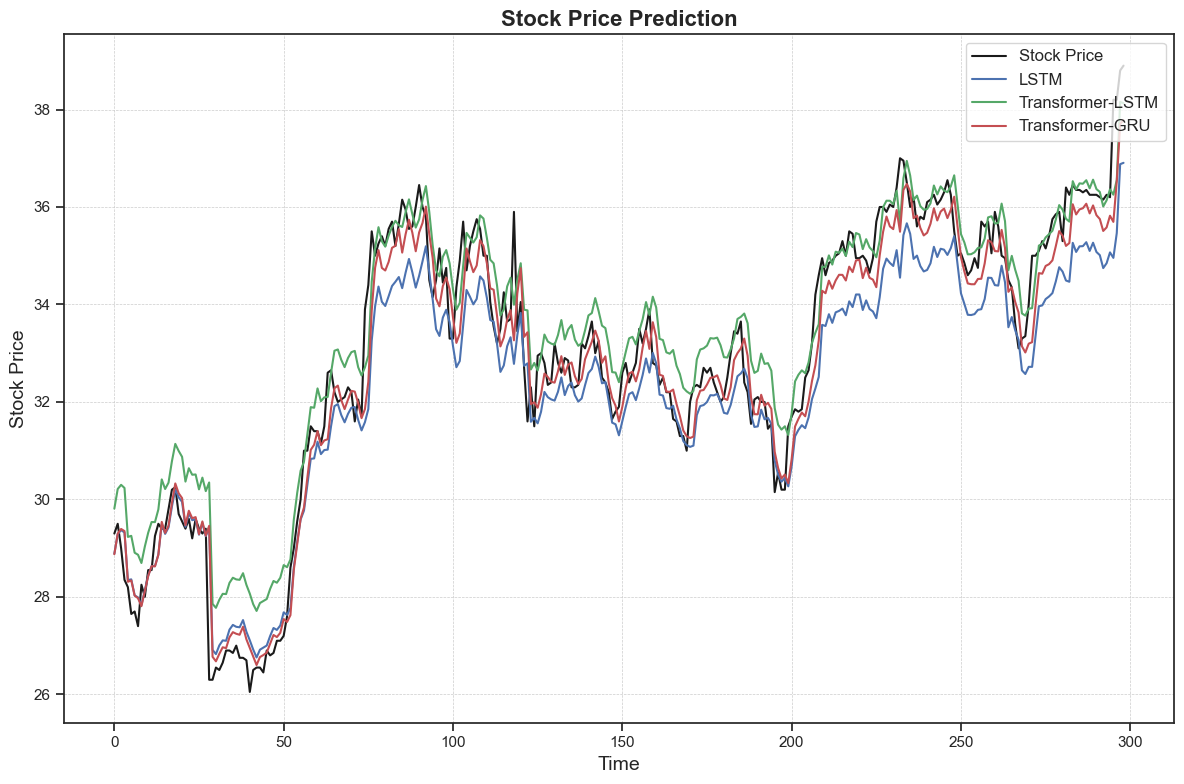

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set(style="ticks")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Time
time = np.arange(0, len(trueprice), 1)
# Plotting the loss for each model with different styles and increased line width
plt.plot(time, trueprice, label = "Stock Price", color='k')
plt.plot(time, lstm_pred, label='LSTM', color='b', linewidth=1.5)
plt.plot(time, transformerlstm_pred, label='Transformer-LSTM', color='g', linewidth=1.5)
plt.plot(time, transformergru_pred, label='Transformer-GRU', color='r', linewidth=1.5)

# Adding labels and title with enhanced font sizes
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Stock Price Prediction', fontsize=16, fontweight='bold')

# Adding a legend with a shadow effect
plt.legend(loc='upper right', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a tight layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()